# Welcome to the 5 lab! Now we will make a magic...

## punkt 1 - 2

подключение необходимых библиотек

In [5]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

(часть пункта 2) создание списка путей к картинам, а также разделение его на тестовый, валидный и тренировочный

In [6]:
images_list = []
images_list = glob.glob(os.path.join('dataset/dataset_random_name','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

проверка списков

In [7]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

2085
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
1668
['dataset/dataset_random_name\\00001.polar_bears.jpg', 'dataset/dataset_random_name\\00012.brown_bears.jpg', 'dataset/dataset_random_name\\00015.brown_bears.jpg', 'dataset/dataset_random_name\\00018.brown_bears.jpg', 'dataset/dataset_random_name\\00019.polar_bears.jpg']
208
['dataset/dataset_random_name\\08065.polar_bears.jpg', 'dataset/dataset_random_name\\08070.brown_bears.jpg', 'dataset/dataset_random_name\\08071.polar_bears.jpg', 'dataset/dataset_random_name\\08080.brown_bears.jpg', 'dataset/dataset_random_name\\08084.brown_bears.jpg']
209
['dataset/dataset_random_name\\09081.polar_bears.jpg', 'dataset/dataset_random_name\\09083.brown_bears.jpg', 'dataset/dataset_random_name\\09084.brown_bears.jpg', 'datas

проверка картинок

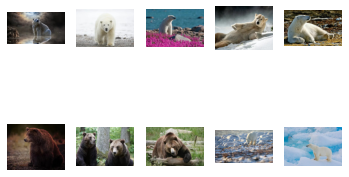

In [8]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')


plt.show()

класс dataset, который будет хранить загруженные и преобразованные изображения и метки классов 0 - бурые мишки,     1 - полярные мишки

In [9]:
class dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        
        label = img_path.split('/')[-1].split('.')[1]
        if label == 'brown_bears':
            label=0
        elif label == 'polar_bears':
            label=1
        #print(label)  
            
        return img_transformed,label

## punkt 4

пайплайн предобработки данных и формированя набора даных, который непосредственно будет участвовать в обучении

In [10]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = dataset(train_list, transform=train_transforms)
test_data = dataset(test_list, transform=test_transforms)
val_data = dataset(val_list, transform=val_transforms)

проверка данных

In [11]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0.1373, 0.1333, 0.1333,  ..., 0.2235, 0.2196, 0.2235],
         [0.1373, 0.1333, 0.1333,  ..., 0.2118, 0.2078, 0.2118],
         [0.1373, 0.1333, 0.1294,  ..., 0.1922, 0.1882, 0.1922],
         ...,
         [0.0941, 0.0941, 0.0941,  ..., 0.1059, 0.1176, 0.1333],
         [0.0902, 0.0902, 0.0902,  ..., 0.1176, 0.1176, 0.1255],
         [0.0863, 0.0902, 0.0902,  ..., 0.1216, 0.1176, 0.1216]],

        [[0.2745, 0.2784, 0.2824,  ..., 0.2275, 0.2196, 0.2196],
         [0.2745, 0.2784, 0.2824,  ..., 0.2157, 0.2078, 0.2078],
         [0.2745, 0.2784, 0.2824,  ..., 0.1961, 0.1882, 0.1882],
         ...,
         [0.1294, 0.1333, 0.1333,  ..., 0.0980, 0.1098, 0.1255],
         [0.1255, 0.1294, 0.1294,  ..., 0.1098, 0.1098, 0.1176],
         [0.1255, 0.1294, 0.1294,  ..., 0.1137, 0.1098, 0.1137]],

        [[0.4314, 0.4314, 0.4275,  ..., 0.2510, 0.2510, 0.2549],
         [0.4314, 0.4314, 0.4275,  ..., 0.2392, 0.2392, 0.2431],
         [0.4314, 0.4353, 0.4314,  ..., 0.2196, 0.2196, 0

## punkt 3

задание значений для количества обрабатываемых за раз изобрадений и скорости обучения

In [12]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

загрузка набора данных в dataloader

In [13]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True )

test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=batch_size, 
                                         shuffle=False)

порверка наборов

In [14]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1668 17
209 3


torch.Size([3, 224, 224])

модель сверточной нейросети для решения задачи классификации

In [15]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

## punkt 5

перенос данных в одно место (у меня это cpu, все работает)

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)


задание параметров обработки - оптимизация - обновлене данных и критерий ошибки, по которому сеть будеть обучаться

In [17]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.BCELoss()

цикл обучения нейросети

In [22]:
accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

def train_loop(train_loader, val_loader):
    epochs = 10
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            
            output = model(data)
            loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)
            
        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
        
        accuracy_values.append(epoch_accuracy.item())
        loss_values.append(epoch_loss.item())
        
        model.eval()
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label.unsqueeze(dim=1).to(torch.float))
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        val_accuracy_values.append(epoch_val_accuracy.item())
        val_loss_values.append(epoch_val_loss.item())
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))
        print('\n')

In [23]:
train_loop(train_loader, val_loader)

Epoch : 1, train accuracy : 0.49121105670928955, train loss : 0.16872435808181763
Epoch : 1, val_accuracy : 0.602222204208374, val_loss : 0.19229188561439514


Epoch : 2, train accuracy : 0.48899656534194946, train loss : 0.18843711912631989
Epoch : 2, val_accuracy : 0.602222204208374, val_loss : 0.14098575711250305


Epoch : 3, train accuracy : 0.4903806149959564, train loss : 0.197618767619133
Epoch : 3, val_accuracy : 0.602222204208374, val_loss : 0.1173577606678009


Epoch : 4, train accuracy : 0.4925951659679413, train loss : 0.17912240326404572
Epoch : 4, val_accuracy : 0.602222204208374, val_loss : 0.1069021224975586


Epoch : 5, train accuracy : 0.49231842160224915, train loss : 0.17136485874652863
Epoch : 5, val_accuracy : 0.602222204208374, val_loss : 0.13241462409496307


Epoch : 6, train accuracy : 0.49121105670928955, train loss : 0.1527155637741089
Epoch : 6, val_accuracy : 0.602222204208374, val_loss : 0.0815824642777443


Epoch : 7, train accuracy : 0.49231836199760437,

In [96]:
# код на всякий случай, чтобы долго не искать если функция сломается.....
# epochs = 10

# accuracy_values = []
# loss_values = []

# val_accuracy_values = []
# val_loss_values = []
# model.train()
# for epoch in range(epochs):
#     epoch_loss = 0
#     epoch_accuracy = 0
    
#     for data, label in train_loader:
#         data = data.to(device)
#         label = label.to(device)
        
#         output = model(data)
#         loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         acc = ((output.argmax(dim=1) == label).float().mean())
#         epoch_accuracy += acc/len(train_loader)
#         epoch_loss += loss/len(train_loader)
        
#     print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
    
#     accuracy_values.append(epoch_accuracy.item())
#     loss_values.append(epoch_loss.item())
    
#     model.eval()
#     epoch_val_accuracy=0
#     epoch_val_loss =0
#     for data, label in val_loader:
#         data = data.to(device)
#         label = label.to(device)
        
#         val_output = model(data)
#         val_loss = criterion(val_output,label.unsqueeze(dim=1).to(torch.float))
        
        
#         acc = ((val_output.argmax(dim=1) == label).float().mean())
#         epoch_val_accuracy += acc/ len(val_loader)
#         epoch_val_loss += val_loss/ len(val_loader)
        
#     val_accuracy_values.append(epoch_val_accuracy.item())
#     val_loss_values.append(epoch_val_loss.item())
#     print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))
#     print('\n')

## punkt 6

на созданных во время обучения наборах строятся графики для значений функции потерь и метрики качества

график для обучающей выборки

In [30]:
def show_results(acc, loss):
    plt.figure(figsize=(15, 5))
    plt.plot(range(10), acc, color="green")
    plt.legend(["Accuracy"])
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.plot(range(10), loss, color="blue")
    plt.legend(["Loss"])
    plt.show() 
    
    print(acc, '\n',loss)

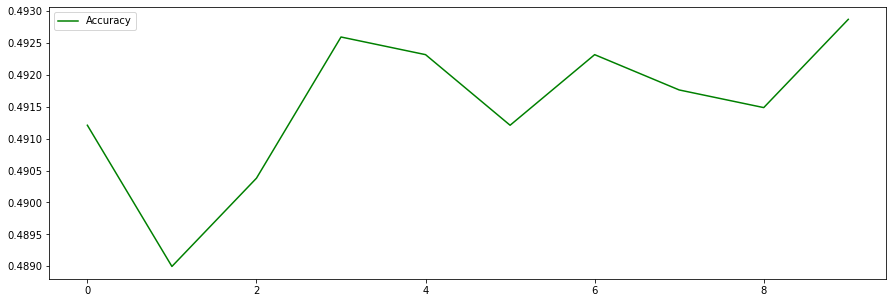

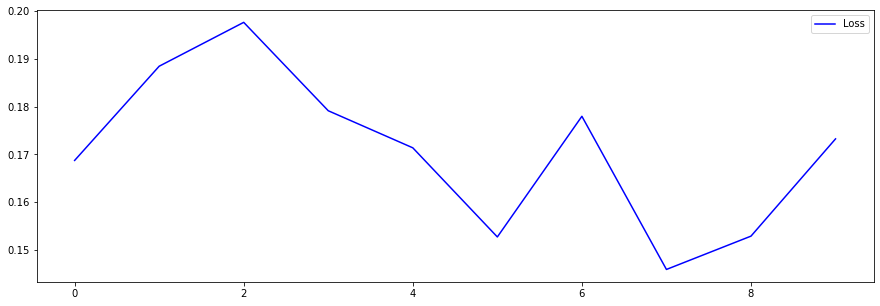

[0.49121105670928955, 0.48899656534194946, 0.4903806149959564, 0.4925951659679413, 0.49231842160224915, 0.49121105670928955, 0.49231836199760437, 0.49176469445228577, 0.49148792028427124, 0.4928719401359558] 
 [0.16872435808181763, 0.18843711912631989, 0.197618767619133, 0.17912240326404572, 0.17136485874652863, 0.1527155637741089, 0.17796172201633453, 0.14591476321220398, 0.15288567543029785, 0.17323683202266693]


In [31]:
show_results(accuracy_values, loss_values)

график для валидационной выборки

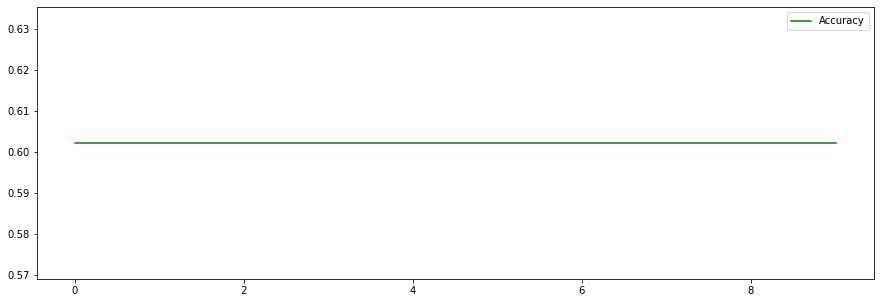

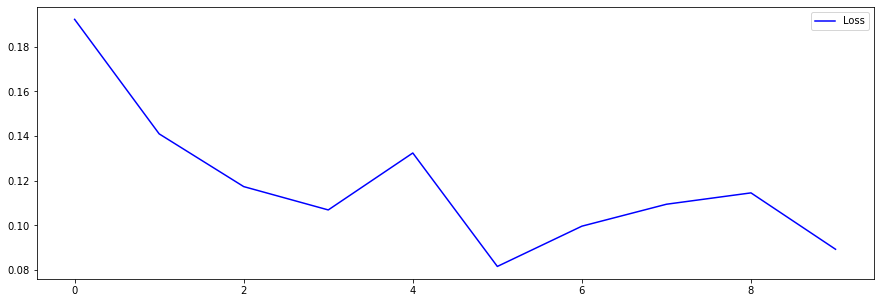

[0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374] 
 [0.19229188561439514, 0.14098575711250305, 0.1173577606678009, 0.1069021224975586, 0.13241462409496307, 0.0815824642777443, 0.0996270403265953, 0.1094554215669632, 0.11454315483570099, 0.08928140997886658]


In [32]:
show_results(val_accuracy_values, val_loss_values)


# plt.figure(figsize=(15, 5))
# plt.plot(range(10), val_accuracy_values, color="red")
# plt.legend(["Accuracy_val"])
# plt.show()

# plt.figure(figsize=(15, 5))
# plt.plot(range(10),val_loss_values, color="gray")
# plt.legend(["Loss_val"])
# plt.show()

## train loop - 1

Epoch : 1, train accuracy : 0.49176472425460815, train loss : 0.12240273505449295
Epoch : 1, val_accuracy : 0.5893333554267883, val_loss : 0.08807595819234848


Epoch : 2, train accuracy : 0.49281051754951477, train loss : 0.11310692131519318
Epoch : 2, val_accuracy : 0.5893333554267883, val_loss : 0.0708666443824768


Epoch : 3, train accuracy : 0.4896732568740845, train loss : 0.10585128515958786
Epoch : 3, val_accuracy : 0.5893333554267883, val_loss : 0.08902539312839508


Epoch : 4, train accuracy : 0.49281051754951477, train loss : 0.11447280645370483
Epoch : 4, val_accuracy : 0.5893333554267883, val_loss : 0.05679028481245041


Epoch : 5, train accuracy : 0.4907189905643463, train loss : 0.13016346096992493
Epoch : 5, val_accuracy : 0.5893333554267883, val_loss : 0.08536694198846817


Epoch : 6, train accuracy : 0.4928104877471924, train loss : 0.09984781593084335
Epoch : 6, val_accuracy : 0.5893333554267883, val_loss : 0.06953585892915726


Epoch : 7, train accuracy : 0.49385625

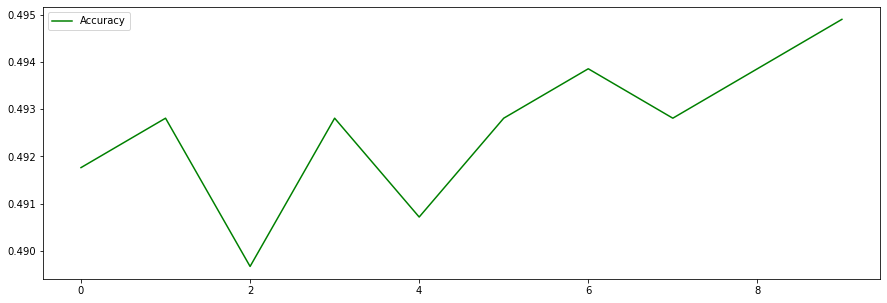

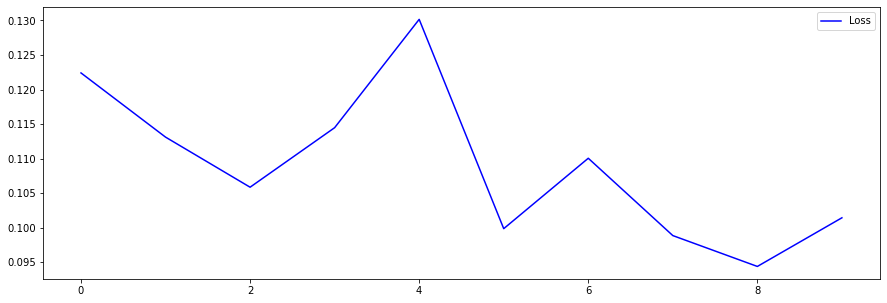

[0.49176472425460815, 0.49281051754951477, 0.4896732568740845, 0.49281051754951477, 0.4907189905643463, 0.4928104877471924, 0.4938562512397766, 0.49281045794487, 0.4938562512397766, 0.49490201473236084] 
 [0.12240273505449295, 0.11310692131519318, 0.10585128515958786, 0.11447280645370483, 0.13016346096992493, 0.09984781593084335, 0.11004515737295151, 0.09884440153837204, 0.09437372535467148, 0.10142043977975845]


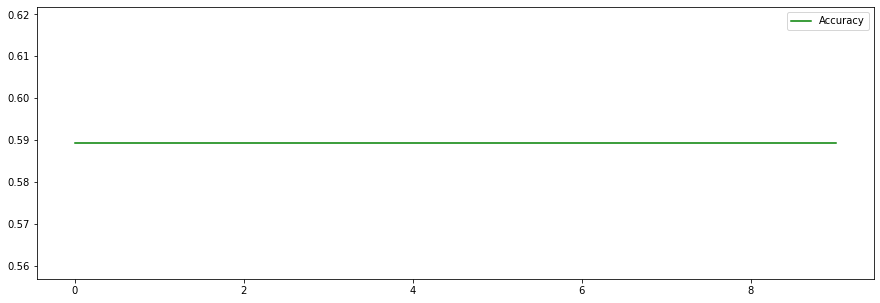

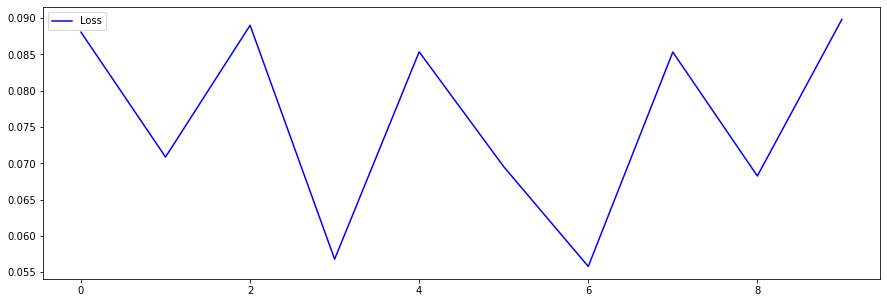

[0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883, 0.5893333554267883] 
 [0.08807595819234848, 0.0708666443824768, 0.08902539312839508, 0.05679028481245041, 0.08536694198846817, 0.06953585892915726, 0.05578438565135002, 0.08533334732055664, 0.06825288385152817, 0.08984362334012985]


In [35]:
lear = 0.0005
batch_size = 50

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)


## train - 2

Epoch : 1, train accuracy : 0.49231839179992676, train loss : 0.11562283337116241
Epoch : 1, val_accuracy : 0.602222204208374, val_loss : 0.10035784542560577


Epoch : 2, train accuracy : 0.4920414984226227, train loss : 0.1059870719909668
Epoch : 2, val_accuracy : 0.602222204208374, val_loss : 0.07269550114870071


Epoch : 3, train accuracy : 0.4920414984226227, train loss : 0.09204331040382385
Epoch : 3, val_accuracy : 0.602222204208374, val_loss : 0.057012878358364105


Epoch : 4, train accuracy : 0.49231839179992676, train loss : 0.10070279240608215
Epoch : 4, val_accuracy : 0.602222204208374, val_loss : 0.06383258104324341


Epoch : 5, train accuracy : 0.4928719401359558, train loss : 0.09658773243427277
Epoch : 5, val_accuracy : 0.602222204208374, val_loss : 0.07158979028463364


Epoch : 6, train accuracy : 0.49231836199760437, train loss : 0.08936981111764908
Epoch : 6, val_accuracy : 0.602222204208374, val_loss : 0.0891226977109909


Epoch : 7, train accuracy : 0.49231833219528

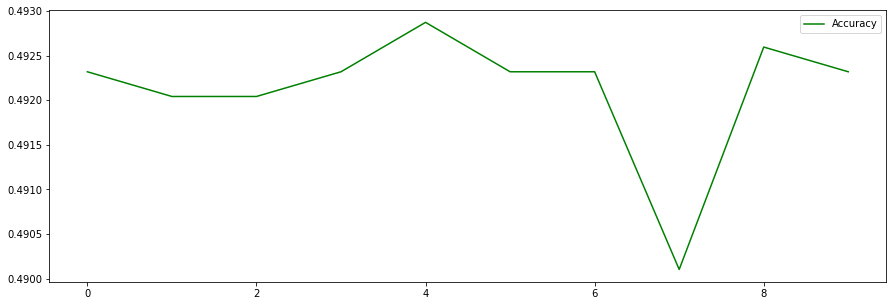

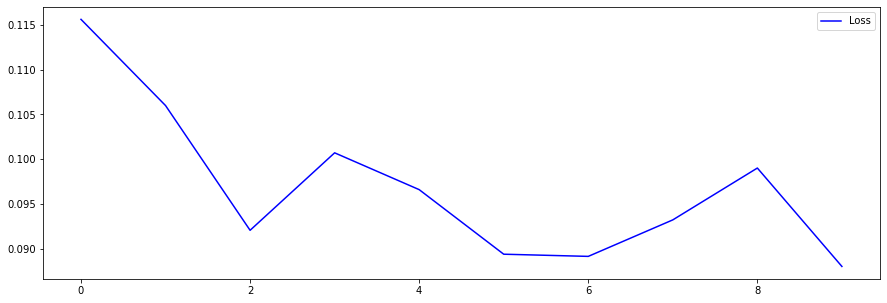

[0.49231839179992676, 0.4920414984226227, 0.4920414984226227, 0.49231839179992676, 0.4928719401359558, 0.49231836199760437, 0.492318332195282, 0.4901037812232971, 0.4925951361656189, 0.492318332195282] 
 [0.11562283337116241, 0.1059870719909668, 0.09204331040382385, 0.10070279240608215, 0.09658773243427277, 0.08936981111764908, 0.08912664651870728, 0.09320741891860962, 0.09900161623954773, 0.08800170570611954]


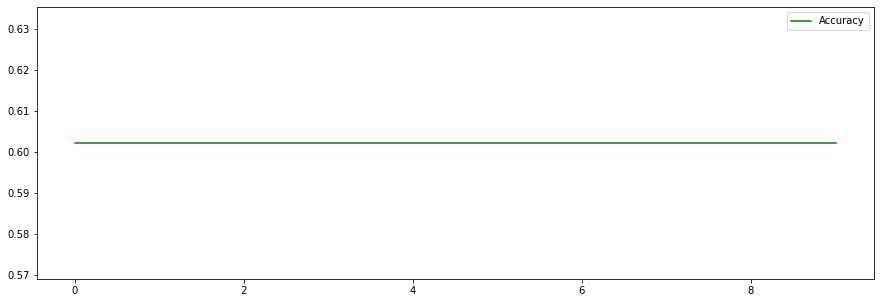

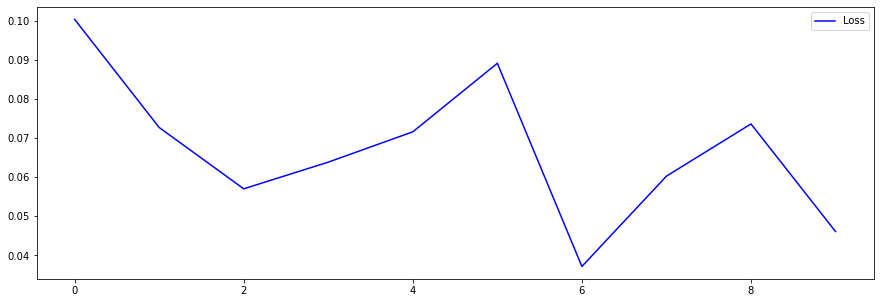

[0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374, 0.602222204208374] 
 [0.10035784542560577, 0.07269550114870071, 0.057012878358364105, 0.06383258104324341, 0.07158979028463364, 0.0891226977109909, 0.037152551114559174, 0.06025229021906853, 0.07360824942588806, 0.04608533903956413]


In [36]:
lear = 0.0005
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = torch.utils.data.DataLoader(dataset = val_data, batch_size=batch_size, shuffle=False)

optimizer = optim.Adam(params = model.parameters(), lr = lear)
criterion = nn.BCELoss()

accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

train_loop(train_loader, val_loader)

show_results(accuracy_values, loss_values)

show_results(val_accuracy_values, val_loss_values)

## punkt 9

сохранение модели 

In [31]:
torch.save(model.state_dict(), os.path.join("C:/Users/zamot/OneDrive/Application-programming-laba-1-2", "weight.pt"))

## punkt 10

повторная инициализация модели

In [34]:
mymodel = Cnn()
mymodel.load_state_dict(torch.load(os.path.join("C:/Users/zamot/OneDrive/Application-programming-laba-1-2", "weight.pt")))

<All keys matched successfully>

запуск модеи на тестовых данных

In [42]:
mymodel.eval()

test_loss = 0
test_accuracy = 0
    
for data, label in test_loader:
    data = data.to(device)
    label = label.to(device)

    output = mymodel(data)
    
    acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(4)])).mean()
    test_accuracy += acc / len(test_loader)
    test_loss += float(loss.detach()) / len(test_loader)

получение значений точности и потерь

In [43]:
print(test_accuracy, test_loss)

0.9166666666666666 0.1370750069618225


проверка модели на 2х рандомных картинках

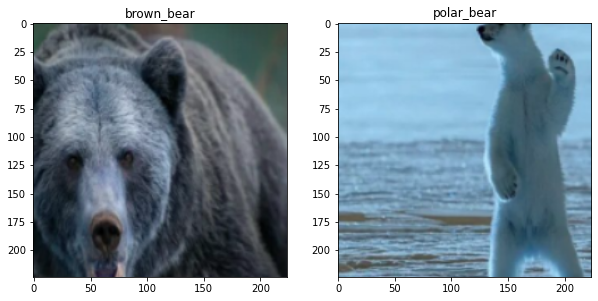

In [65]:
import random
plt.figure(figsize=(10, 5))

for j in range(2):
  index = random.randint(0, len(test_data))
  plt.subplot(1, 2, j + 1)
  plt.title("brown_bear" if (1 if  model(test_data[index][0].unsqueeze(dim=0))[0] >= 0.5 else 0) == 0 else "polar_bear")
  plt.imshow(test_data[index][0].permute(1, 2, 0).numpy()[:, :, ::-1])

## Ураааа! Чудо свершилось!!! Теперь ждем атаку нейросетей...

просто проверка на коммит...